<a href="https://colab.research.google.com/github/VensaHerald/titania/blob/master/titania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/VensaHerald/titania/master/train.csv"
df_t = pd.read_csv(url)
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Did more men or women die on the Titanic


In [4]:
df_t[df_t["Survived"]==0]["Sex"].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [5]:
df_t[df_t["Age"].isna()].shape[0]/df_t.shape[0]

0.19865319865319866

###What was the average age of those who died, and those who survived?
Before I can answer this, I need to sort out the data. From the above cell we can see that there are 20% rows missing age data.  So I will need to drop these from the dataset before beginning


In [6]:
df_dr_age = df_t.dropna(subset=["Age"])
df_dr_age[df_dr_age["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Now these values have been dropped we can look at this column in more detail.  We'll do a histogram to get the lay of the land regarding the distribution of each group (whole pop, survived, non-survived).  And then produce the values of the mean at the end.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


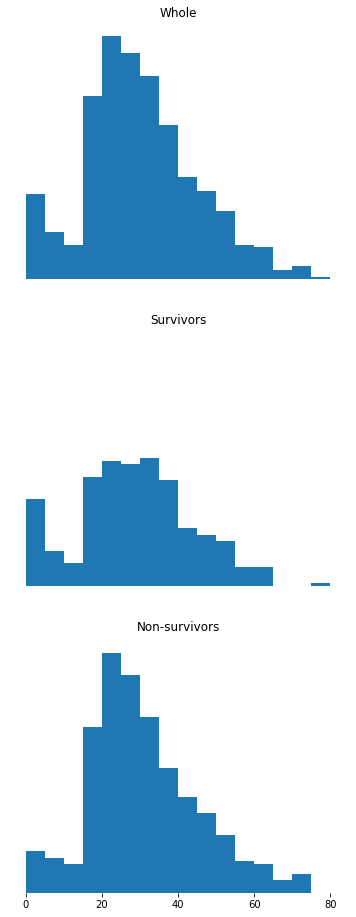

In [34]:
survived = df_dr_age[df_dr_age["Survived"] == 1]
died = df_dr_age[df_dr_age["Survived"] == 0]
titles = ["Whole","Survivors","Non-survivors"]
fig = plt.figure(figsize=(6,16))

for a in range(0,3):
    ax = fig.add_subplot(3,1,a+1)
    ax.set_ylim(0,80)
    ax.set_title(titles[a])
    ax.tick_params(bottom="off",right="off", top="off", left="off")
    ax.set_xticks([])
    ax.set_yticks([])
    
    for key, spine in ax.spines.items():
        spine.set_visible(False)

    if a == 0:
        ax.hist(df_dr_age["Age"], range=(0,80),bins=16)
        ax.set_ylim((0,120))
        
    elif a == 1:
        ax.hist(survived["Age"], range=(0,80), bins=16)
    else:
        ax.hist(died["Age"], range=(0,80),bins=16)
        ax.tick_params(bottom="on")
        ax.set_xticks([0,20,40,60,80])


In [38]:
mean_sur = round(survived["Age"].mean(),2)
mean_nsur = round(died["Age"].mean(),2)
print("Mean survivor was:{}. \nMean non-survivor was:{}".format(mean_sur, mean_nsur))

Mean survivor was:28.34. 
Mean non-survivor was:30.63


###Is there any correlation between rate of surviving and Age
We'll produce a scatter chart to determine whether there is a visible correlation between these two properies.